Statefarm Kaggle Competition; Code gratoitously borrowed from fast.ai
https://www.kaggle.com/c/state-farm-distracted-driver-detection/

## Setup

In [1]:
# Load in theano 
from theano.sandbox import cuda
from imp import reload
import os
%matplotlib inline

# Loads the utils function
import utils; reload(utils)
from utils import *
from __future__ import division, print_function

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5110)
Using Theano backend.


In [2]:
path = '/home/jd/data/statefarm/'
#path = '/home/jd/data/statefarm/sample/'
#path ='/home/jd/nbs/statefarm/data/'

In [3]:
## Set up sound alert
from IPython.display import Audio, display
from imp import reload
import time

def allDone():
 #   self.showtraceback((etype, value, tb), tb_offset=tb_offset)
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

## Setup Batches

In [4]:
batch_size=32

In [5]:
batches = get_batches(path+'train', batch_size=batch_size)
val_batches = get_batches(path+'valid', batch_size=batch_size*2, shuffle=False)

Found 19391 images belonging to 10 classes.
Found 3033 images belonging to 10 classes.


In [6]:
(val_classes, trn_classes, val_labels, trn_labels, 
    val_filenames, filenames, test_filenames) = get_classes(path)

Found 19391 images belonging to 10 classes.
Found 3033 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [7]:
trn = get_data(path+'train')
val = get_data(path+'valid')

Found 19391 images belonging to 10 classes.
Found 3033 images belonging to 10 classes.


In [8]:
save_array(path+'results/val.dat', val)
save_array(path+'results/trn.dat', trn)

In [7]:
val = load_array(path+'results/val.dat')
trn = load_array(path+'results/trn.dat')

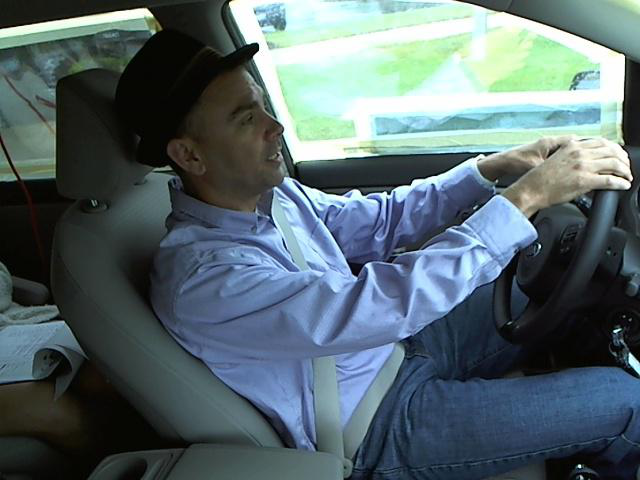

In [16]:
## Test an image is pulled up
from PIL import Image
Image.open(path + "train/"+ filenames[0])

## Run expirments of dataset

### Convolutional Layer

In [30]:
def conv1(batches):
    model = Sequential([
            BatchNormalization(axis=1, input_shape=(3,224,224)),
            Convolution2D(32,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Convolution2D(64,3,3, activation='relu'),
            BatchNormalization(axis=1),
            MaxPooling2D((3,3)),
            Flatten(),
            Dense(200, activation='relu'),
            BatchNormalization(),
            Dense(10, activation='softmax')
        ])

    model.compile(Adam(lr=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, 
                     nb_val_samples=val_batches.nb_sample)
    model.optimizer.lr = 0.001
    model.fit_generator(batches, batches.nb_sample, nb_epoch=4, validation_data=val_batches, 
                     nb_val_samples=val_batches.nb_sample)
    return model

In [18]:
model = conv1(batches)

Epoch 1/2
19391/19391 [==============================] - 210s - loss: 0.2332 - acc: 0.9427 - val_loss: 1.8588 - val_acc: 0.3861
Epoch 2/2
19391/19391 [==============================] - 193s - loss: 0.0137 - acc: 0.9987 - val_loss: 1.1970 - val_acc: 0.5955
Epoch 1/4
19391/19391 [==============================] - 199s - loss: 0.0044 - acc: 0.9998 - val_loss: 1.2348 - val_acc: 0.6429
Epoch 2/4
19391/19391 [==============================] - 193s - loss: 0.0020 - acc: 1.0000 - val_loss: 1.1025 - val_acc: 0.6475
Epoch 3/4
19391/19391 [==============================] - 193s - loss: 0.0027 - acc: 0.9998 - val_loss: 1.1878 - val_acc: 0.6353
Epoch 4/4
19391/19391 [==============================] - 193s - loss: 0.0017 - acc: 0.9999 - val_loss: 1.2036 - val_acc: 0.6350


### Data Augmentation

In [20]:
gen_t = image.ImageDataGenerator(rotation_range=15, height_shift_range=0.05, 
                shear_range=0.1, channel_shift_range=20, width_shift_range=0.1)
batches = get_batches(path+'train', gen_t, batch_size=batch_size)

Found 19391 images belonging to 10 classes.


In [21]:
model = conv1(batches)

Epoch 1/2
19391/19391 [==============================] - 206s - loss: 1.3328 - acc: 0.5702 - val_loss: 1.4883 - val_acc: 0.5536
Epoch 2/2
19391/19391 [==============================] - 201s - loss: 0.6518 - acc: 0.7998 - val_loss: 1.3205 - val_acc: 0.6001
Epoch 1/4
19391/19391 [==============================] - 207s - loss: 0.4538 - acc: 0.8687 - val_loss: 1.2414 - val_acc: 0.6347
Epoch 2/4
19391/19391 [==============================] - 201s - loss: 0.3559 - acc: 0.8990 - val_loss: 0.9449 - val_acc: 0.7316
Epoch 3/4
19391/19391 [==============================] - 201s - loss: 0.2861 - acc: 0.9230 - val_loss: 1.0166 - val_acc: 0.7389
Epoch 4/4
19391/19391 [==============================] - 201s - loss: 0.2402 - acc: 0.9342 - val_loss: 0.9889 - val_acc: 0.7349


In [22]:
model.optimizer.lr = 0.0001
model.fit_generator(batches, batches.nb_sample, nb_epoch=15, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/15
19391/19391 [==============================] - 206s - loss: 0.2081 - acc: 0.9432 - val_loss: 0.9201 - val_acc: 0.7652
Epoch 2/15
19391/19391 [==============================] - 201s - loss: 0.1820 - acc: 0.9539 - val_loss: 0.9995 - val_acc: 0.7267
Epoch 3/15
19391/19391 [==============================] - 201s - loss: 0.1633 - acc: 0.9568 - val_loss: 0.9890 - val_acc: 0.7135
Epoch 4/15
19391/19391 [==============================] - 201s - loss: 0.1459 - acc: 0.9612 - val_loss: 0.8847 - val_acc: 0.7544
Epoch 5/15
19391/19391 [==============================] - 201s - loss: 0.1257 - acc: 0.9680 - val_loss: 0.9396 - val_acc: 0.7300
Epoch 6/15
19391/19391 [==============================] - 202s - loss: 0.1254 - acc: 0.9659 - val_loss: 0.8496 - val_acc: 0.7488
Epoch 7/15
19391/19391 [==============================] - 201s - loss: 0.1128 - acc: 0.9706 - val_loss: 0.9678 - val_acc: 0.7013
Epoch 8/15
19391/19391 [==============================] - 201s - loss: 0.1025 - acc: 0.9734 - val

### Four conv/pooling pairs + dropout

In [23]:
gen_t = image.ImageDataGenerator(rotation_range=15, height_shift_range=0.05, 
                shear_range=0.1, channel_shift_range=20, width_shift_range=0.1)
batches = get_batches(path+'train', gen_t, batch_size=batch_size)

Found 19391 images belonging to 10 classes.


In [24]:
model = Sequential([
        BatchNormalization(axis=1, input_shape=(3,224,224)),
        Convolution2D(32,3,3, activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(64,3,3, activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(128,3,3, activation='relu'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Flatten(),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(200, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

In [25]:
model.compile(Adam(lr=10e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=2, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/2
19391/19391 [==============================] - 208s - loss: 2.5656 - acc: 0.2603 - val_loss: 1.6945 - val_acc: 0.4372
Epoch 2/2
19391/19391 [==============================] - 202s - loss: 1.7280 - acc: 0.4544 - val_loss: 1.1125 - val_acc: 0.6334


In [ ]:
model.optimizer.lr=0.001

In [ ]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=10, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/10
19391/19391 [==============================] - 207s - loss: 1.2873 - acc: 0.5781 - val_loss: 0.9176 - val_acc: 0.6911
Epoch 2/10
19391/19391 [==============================] - 203s - loss: 1.0031 - acc: 0.6656 - val_loss: 0.8885 - val_acc: 0.7158
Epoch 3/10
19391/19391 [==============================] - 203s - loss: 0.7985 - acc: 0.7339 - val_loss: 0.8253 - val_acc: 0.7438
Epoch 4/10
19391/19391 [==============================] - 203s - loss: 0.6381 - acc: 0.7855 - val_loss: 0.6653 - val_acc: 0.7742
Epoch 5/10
19391/19391 [==============================] - 203s - loss: 0.5487 - acc: 0.8183 - val_loss: 0.8598 - val_acc: 0.7039
Epoch 6/10
19391/19391 [==============================] - 202s - loss: 0.4753 - acc: 0.8438 - val_loss: 0.6609 - val_acc: 0.8167
Epoch 7/10
19391/19391 [==============================] - 203s - loss: 0.4087 - acc: 0.8660 - val_loss: 0.7686 - val_acc: 0.7646
Epoch 8/10
19391/19391 [==============================] - 203s - loss: 0.3709 - acc: 0.8770 - val

In [ ]:
model.optimizer.lr=0.00001

In [ ]:
model.fit_generator(batches, batches.nb_sample, nb_epoch=10, validation_data=val_batches, 
                 nb_val_samples=val_batches.nb_sample)

Epoch 1/10
19391/19391 [==============================] - 207s - loss: 0.2675 - acc: 0.9144 - val_loss: 0.5474 - val_acc: 0.8335
Epoch 2/10
19391/19391 [==============================] - 202s - loss: 0.2521 - acc: 0.9182 - val_loss: 0.7593 - val_acc: 0.7962
Epoch 3/10
19391/19391 [==============================] - 203s - loss: 0.2219 - acc: 0.9285 - val_loss: 0.5337 - val_acc: 0.8536
Epoch 4/10
19391/19391 [==============================] - 202s - loss: 0.2131 - acc: 0.9297 - val_loss: 0.6784 - val_acc: 0.8144
Epoch 5/10
19391/19391 [==============================] - 203s - loss: 0.1964 - acc: 0.9381 - val_loss: 0.8030 - val_acc: 0.8140
Epoch 6/10
19391/19391 [==============================] - 202s - loss: 0.1763 - acc: 0.9459 - val_loss: 0.6600 - val_acc: 0.8167
Epoch 7/10
19391/19391 [==============================] - 203s - loss: 0.1766 - acc: 0.9462 - val_loss: 0.6466 - val_acc: 0.8480
Epoch 8/10
19391/19391 [==============================] - 203s - loss: 0.1669 - acc: 0.9483 - val

In [50]:
model.save_weights(path+'models/jd-bfImage.h5')

In [51]:
model.load_weights(path+'models/jd-bfImage.h5')

### Imagenet conv features


In [10]:
vgg = Vgg16()
model=vgg.model
last_conv_idx = [i for i,l in enumerate(model.layers) if type(l) is Convolution2D][-1]
conv_layers = model.layers[:last_conv_idx+1]

In [11]:
batch_size=32
conv_model = Sequential(conv_layers)

In [12]:
# batches shuffle must be set to False when pre-computing features
batches = get_batches(path+'train', batch_size=batch_size, shuffle=False)
test_batches = get_batches(path+'test', batch_size=batch_size, shuffle=False)
val_batches = get_batches(path+'valid', batch_size=batch_size*2, shuffle=False)

Found 19391 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.
Found 3033 images belonging to 10 classes.


In [13]:
(val_classes, trn_classes, val_labels, trn_labels, 
    val_filenames, filenames, test_filenames) = get_classes(path)

Found 19391 images belonging to 10 classes.
Found 3033 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [ ]:
#convolution models take a long time
conv_feat = conv_model.predict_generator(batches, batches.nb_sample)
conv_val_feat = conv_model.predict_generator(val_batches, val_batches.nb_sample)

In [ ]:
conv_test_feat = conv_model.predict_generator(test_batches, test_batches.nb_sample)

In [ ]:
save_array(path+'results/conv_val_feat.dat', conv_val_feat)
save_array(path+'results/conv_test_feat.dat', conv_test_feat)
save_array(path+'results/conv_feat.dat', conv_feat)

In [ ]:
conv_feat = load_array(path+'results/conv_feat.dat')
conv_val_feat = load_array(path+'results/conv_val_feat.dat')
conv_val_feat.shape

In [18]:
allDone()

### Batchnorm dense layers on pretrained conv layers

In [16]:
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dropout(p/2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(10, activation='softmax')
        ]

In [17]:
p=0.8

In [14]:
bn_model = Sequential(get_bn_layers(p))
bn_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

NameError: name 'conv_layers' is not defined

In [26]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=2, 
             validation_data=(conv_val_feat, val_labels))

Train on 19391 samples, validate on 3033 samples
Epoch 1/2
19391/19391 [==============================] - 7s - loss: 0.0901 - acc: 0.9743 - val_loss: 0.5562 - val_acc: 0.8180
Epoch 2/2
19391/19391 [==============================] - 7s - loss: 0.0783 - acc: 0.9775 - val_loss: 0.9592 - val_acc: 0.7221


In [27]:
bn_model.optimizer.lr=0.01

In [28]:
bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=2, 
             validation_data=(conv_val_feat, val_labels))

Train on 19391 samples, validate on 3033 samples
Epoch 1/2
19391/19391 [==============================] - 7s - loss: 0.0726 - acc: 0.9795 - val_loss: 0.6389 - val_acc: 0.7985
Epoch 2/2
19391/19391 [==============================] - 7s - loss: 0.0647 - acc: 0.9810 - val_loss: 0.7489 - val_acc: 0.7629


In [29]:
bn_model.save_weights(path+'models/conv8.h5')

### Pre-computed data augmentation + dropout

In [ ]:
batch_size=32

In [ ]:
bn_model.load_weights(path+'models/conv8.h5')

In [ ]:
vgg = Vgg16()
model=vgg.model
last_conv_idx = [i for i,l in enumerate(model.layers) if type(l) is Convolution2D][-1]
conv_layers = model.layers[:last_conv_idx+1]
conv_model = Sequential(conv_layers)

In [ ]:
conv_feat = load_array(path+'results/conv_feat.dat')
conv_val_feat = load_array(path+'results/conv_val_feat.dat')
conv_val_feat.shape

In [ ]:
gen_t = image.ImageDataGenerator(rotation_range=15, height_shift_range=0.05, 
                shear_range=0.1, channel_shift_range=20, width_shift_range=0.1)
da_batches = get_batches(path+'train', gen_t, batch_size=batch_size, shuffle=False)

In [ ]:
da_conv_feat = conv_model.predict_generator(da_batches, da_batches.nb_sample*2)

In [ ]:
save_array(path+'results/da_conv_feat2.dat', da_conv_feat)

In [ ]:
da_conv_feat = load_array(path+'results/da_conv_feat2.dat')

In [ ]:
da_conv_feat = np.concatenate([da_conv_feat, conv_feat])

In [ ]:
da_trn_labels = np.concatenate([trn_labels]*6)

In [ ]:
def get_bn_da_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dropout(p),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(10, activation='softmax')
        ]

In [ ]:
p=0.8

In [ ]:
bn_model = Sequential(get_bn_da_layers(p))
bn_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
bn_model.fit(da_conv_feat, da_trn_labels, batch_size=batch_size*2, nb_epoch=1, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
bn_model.optimizer.lr=0.01

In [ ]:
bn_model.fit(da_conv_feat, da_trn_labels, batch_size=batch_size, nb_epoch=4, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
bn_model.optimizer.lr=0.0001

In [ ]:
bn_model.fit(da_conv_feat, da_trn_labels, batch_size=batch_size, nb_epoch=4, 
             validation_data=(conv_val_feat, val_labels))

### Pseudo labeling


In [ ]:
val_pseudo = bn_model.predict(conv_val_feat, batch_size=batch_size)

In [ ]:
comb_pseudo = np.concatenate([da_trn_labels, val_pseudo])

In [ ]:
comb_feat = np.concatenate([da_conv_feat, conv_val_feat])

In [ ]:
bn_model.load_weights(path+'models/da_conv8_1.h5')

In [ ]:
bn_model.fit(comb_feat, comb_pseudo, batch_size=batch_size, nb_epoch=1, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
bn_model.fit(comb_feat, comb_pseudo, batch_size=batch_size, nb_epoch=4, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
bn_model.optimizer.lr=0.00001

In [ ]:
bn_model.fit(comb_feat, comb_pseudo, batch_size=batch_size, nb_epoch=4, 
             validation_data=(conv_val_feat, val_labels))

In [ ]:
bn_model.save_weights(path+'models/bn-ps8.h5')

## Prime for submit

In [9]:
vgg = Vgg16()
model=vgg.model
last_conv_idx = [i for i,l in enumerate(model.layers) if type(l) is Convolution2D][-1]
conv_layers = model.layers[:last_conv_idx+1]

def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dropout(p/2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(10, activation='softmax')
        ]
p=0.8
bn_model = Sequential(get_bn_layers(p))

### Submit

In [40]:
def do_clip(arr, mx): return np.clip(arr, (1-mx)/9, mx)

In [41]:
#keras.metrics.categorical_crossentropy(val_labels, do_clip(val_preds, 0.93)).eval()

In [42]:
#conv_test_feat = load_array(path+'results/conv_test_feat.dat')
bn_model.load_weights(path+'models/conv8.h5')

In [43]:
#preds = bn_model.predict(conv_test_feat, batch_size=batch_size*2)
preds = bn_model.predict(conv_test_feat, batch_size=batch_size*2)

In [44]:
subm = do_clip(preds,0.93)

In [45]:
subm_name = 'subm1.gz'

In [46]:
classes = sorted(batches.class_indices, key=batches.class_indices.get)

In [47]:
submission = pd.DataFrame(subm, columns=classes)
submission.insert(0, 'img', [a[5:] for a in test_filenames])
submission.head()

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_99564.jpg,0.007778,0.007778,0.007778,0.007778,0.015326,0.930000,0.007778,0.007778,0.007778,0.007778
1,img_91801.jpg,0.011893,0.083859,0.007778,0.007778,0.227682,0.351905,0.299463,0.008430,0.007778,0.007778
2,img_44891.jpg,0.007778,0.007778,0.007778,0.010899,0.930000,0.007778,0.007778,0.007778,0.007778,0.007778
3,img_33209.jpg,0.012578,0.516914,0.007778,0.007778,0.007778,0.009882,0.007778,0.362117,0.050708,0.037525
4,img_77367.jpg,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.930000


In [48]:
submission.to_csv(subm_name, index=False, compression='gzip')

In [49]:
FileLink(subm_name)

/home/jd/FastAi/subm1.gz

In [20]:
allDone()